In [46]:
import numpy as np
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Web Scraping

In [ ]:








brand = []
model = []
ram = []
rom = []
screen_size_cm = []
os = []
processor = []
waranty_for_device = []
price = []



for i in range(0,250):
    url1=f"https://www.flipkart.com/search?q=laptops+under+100000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    page = requests.get(url1)
    page_soup = BeautifulSoup(page.text)
    for i in page_soup.find_all("div",class_="jIjQ8S"):
        #1.Brand--------

        
        brand_name = re.findall(r"Compare(\w+)",i.text)
        if brand_name :
            brand.append(brand_name[0])
        else:
            brand.append(np.nan)          
       #2.model name--------
        model_name = re.findall(r"Compare\w+\s(\w+)",i.text)
        if model_name :
            model.append(model_name[0])
        else:
            model.append(np.nan)           
        #3.ram-----------    
    for i in page_soup.find_all("div",class_="jIjQ8S"):
        ram_size =re.findall(r"(\d\d?)\sGB.+RAM",i.text)
        if ram_size:
            ram.append(ram_size[0])
        else:
            ram.append(np.nan)
        #4.rom--------
        rom_size =re.findall(r"(\d{1,3})\sGB\sSSD",i.text)
        if rom_size:
            rom.append(rom_size[0])
        else:
            rom.append(np.nan)
        #5.processor-------
        processor_name =re.findall(r"\/(\d+)\sGB",i.text)
        if processor_name:
            processor.append(processor_name[0])
        else:
            processor.append(np.nan)
        #6.os----------

        
        operating_system =re.findall(r"RAM(.+)\sOperating System",i.text)
        if operating_system:
            os.append(operating_system[0])
        else:
            os.append(np.nan)
        #7. screen size -------
        screen_size =re.findall(r"\((\d\d\.?\d?)\si?I?nch\)",i.text)
        
        if screen_size:
            screen_size_cm.append(screen_size[0])
        else:
            screen_size_cm.append(np.nan)
        warranty =re.findall(r"(\d)\sYear.+Warranty",i.text)
        #8.warrany--------
        if warranty:
            waranty_for_device.append(warranty[0])
        else:
            waranty_for_device.append(np.nan)
         #9.price ------
        price____=re.findall(r"(\d+\,\d+\s)Off",i.text)
        if price____:
            price.append(price____[0])
        else:
            price.append(np.nan)
        

In [ ]:
#convert into data frame
dct = {"Brand":brand,"Model":model,"Ram":ram,"Rom":rom,"Screen_size":screen_size_cm,"Operating System":os,"Processor":processor,"Warranty":waranty_for_device,"Price":price}
df1= pd.DataFrame(dct)

In [ ]:
# save the dataframe
df1.to_csv("Laptop_dataset_final_1.csv")                                                                                            

# 2.Load the dataset

In [47]:
df = pd.read_csv(r"C:\Users\kandr\Downloads\Laptop_dataset_final_1.csv",index_col=0)
df

,Brand,Model,Ram,Rom,Screen_size,Operating System,Processor,Warranty,Price
0,Samsung,Galaxy,16,512.0,15.6,64 bit Windows 11,512.0,1.0,"22,000"
1,Acer,Chromebook,8,NaN,15.6,Chrome,128.0,1.0,"11,000"
2,Samsung,Galaxy,16,512.0,15.6,Windows 11,512.0,1.0,"22,000"
3,Acer,NITRO,16,512.0,16.0,64 bit Windows 11 Home,512.0,1.0,"24,000"
4,Acer,Aspire,8,256.0,11.6,64 bit Windows 11 Home,256.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
979,MSI,Prestige,16,NaN,14.0,Windows 11,NaN,2.0,"22,000"
980,ASUS,Vivobook,8,512.0,15.6,Windows 11 Home,512.0,1.0,"26,000"
981,MOTOROLA,Motobook,16,512.0,14.0,64 bit Windows 11,512.0,1.0,"22,000"
982,Acer,Aspire,16,512.0,15.6,Windows 11,512.0,1.0,NaN


# 3.information about data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             984 non-null    object 
 1   Model             981 non-null    object 
 2   Ram               984 non-null    int64  
 3   Rom               745 non-null    float64
 4   Screen_size       978 non-null    float64
 5   Operating System  984 non-null    object 
 6   Processor         843 non-null    float64
 7   Warranty          809 non-null    float64
 8   Price             670 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 76.9+ KB


In [82]:
df.shape

(390, 8)

In [83]:
df.describe()

,Ram,Rom,Screen_size,Warranty,Price
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,13.871795,495.917949,14.931795,1.069231,21963.333333
std,7.577125,65.171740,1.076109,0.291837,2801.792332
min,4.000000,128.000000,11.600000,1.000000,8200.000000
25%,8.000000,512.000000,14.000000,1.000000,22000.000000
50%,16.000000,512.000000,15.600000,1.000000,22000.000000
75%,16.000000,512.000000,15.600000,1.000000,22000.000000
max,64.000000,512.000000,18.000000,3.000000,32000.000000


In [49]:
# check null values 
df.isnull().sum()

Brand                 0
Model                 3
Ram                   0
Rom                 239
Screen_size           6
Operating System      0
Processor           141
Warranty            175
Price               314
dtype: int64

In [50]:
# check duplicates
df.duplicated().sum()

484

# 4. data cleaning 

In [78]:
# drop the duplicates values
df.drop_duplicates(inplace=True)

In [52]:
# convert price column into origianl datatype
df["Price"]=df["Price"].str.replace(",","",regex=False).astype(float)

In [53]:
df["Price"]=df["Price"].fillna(df["Price"].median())

In [61]:
df["Warranty"]=df["Warranty"].fillna(df["Warranty"].median())

In [63]:
df["Rom"]=df["Rom"].fillna(df["Rom"].median())

In [56]:
df["Ram"]=df["Ram"].fillna(df["Ram"].mode())

In [59]:
# remove unwanted column
df=df.drop(columns=["Processor"])

In [75]:
df.dropna(inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             493 non-null    object 
 1   Model             493 non-null    object 
 2   Ram               493 non-null    int64  
 3   Rom               493 non-null    float64
 4   Screen_size       493 non-null    float64
 5   Operating System  493 non-null    object 
 6   Warranty          493 non-null    float64
 7   Price             493 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 34.7+ KB


# After Cleaning the data

In [72]:
df.info()                                   

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             493 non-null    object 
 1   Model             493 non-null    object 
 2   Ram               493 non-null    int64  
 3   Rom               493 non-null    float64
 4   Screen_size       493 non-null    float64
 5   Operating System  493 non-null    object 
 6   Warranty          493 non-null    float64
 7   Price             493 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 34.7+ KB


In [73]:
df.describe() 

,Ram,Rom,Screen_size,Warranty,Price
count,493.000000,493.000000,493.000000,493.000000,493.000000
mean,13.918864,498.758621,14.969371,1.060852,22035.902637
std,6.993138,59.335485,1.028286,0.271155,2546.141080
min,4.000000,128.000000,11.600000,1.000000,8200.000000
25%,8.000000,512.000000,14.000000,1.000000,22000.000000
50%,16.000000,512.000000,15.600000,1.000000,22000.000000
75%,16.000000,512.000000,15.600000,1.000000,22000.000000
max,64.000000,512.000000,18.000000,3.000000,32000.000000


In [79]:
df

,Brand,Model,Ram,Rom,Screen_size,Operating System,Warranty,Price
0,Samsung,Galaxy,16,512.0,15.6,64 bit Windows 11,1.0,22000.0
1,Acer,Chromebook,8,512.0,15.6,Chrome,1.0,11000.0
2,Samsung,Galaxy,16,512.0,15.6,Windows 11,1.0,22000.0
3,Acer,NITRO,16,512.0,16.0,64 bit Windows 11 Home,1.0,24000.0
4,Acer,Aspire,8,256.0,11.6,64 bit Windows 11 Home,1.0,22000.0
...,...,...,...,...,...,...,...,...
969,ASUS,ROG,32,512.0,14.0,Windows 11 Home,1.0,32000.0
973,HP,14,8,512.0,14.0,64 bit Windows 11,1.0,22000.0
975,MICROSOFT,12,16,512.0,12.0,64 bit Windows 11 Home,1.0,22000.0
979,MSI,Prestige,16,512.0,14.0,Windows 11,2.0,22000.0


# Exploratory Data Analysis (EDA) – Visualizations

In [ ]:
In this section, we analyze the laptop dataset using a variety of visualizations to understand patterns
, distributions, relationships, and trends across different features.”

# 1.Univariate EDA

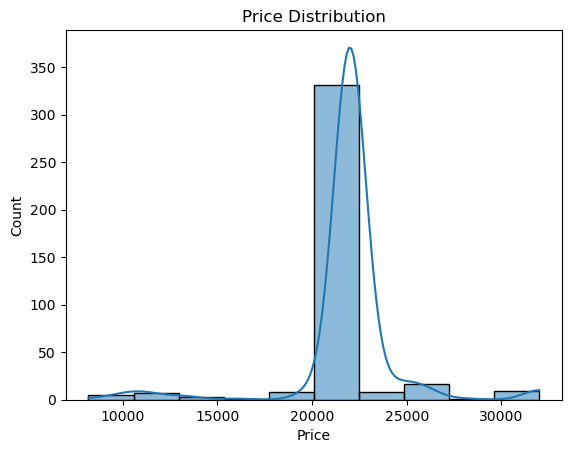

In [156]:
# Univariate Plot: Histogram + KDE (Price)
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()


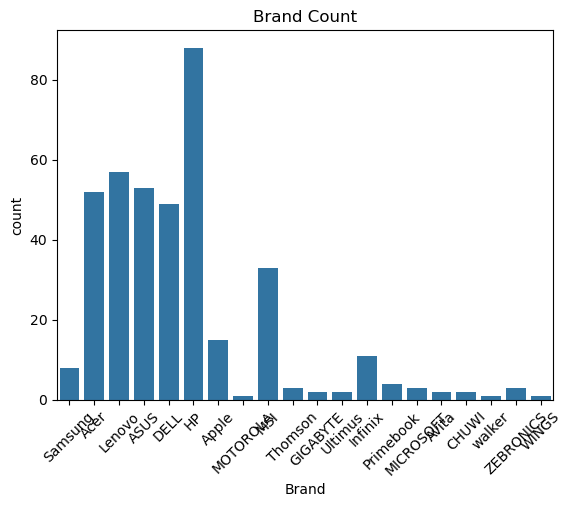

In [158]:
# Univariate Plot: Brand Countplot
sns.countplot(x=df["Brand"])
plt.title("Brand Count")
plt.xticks(rotation=45)
plt.show()


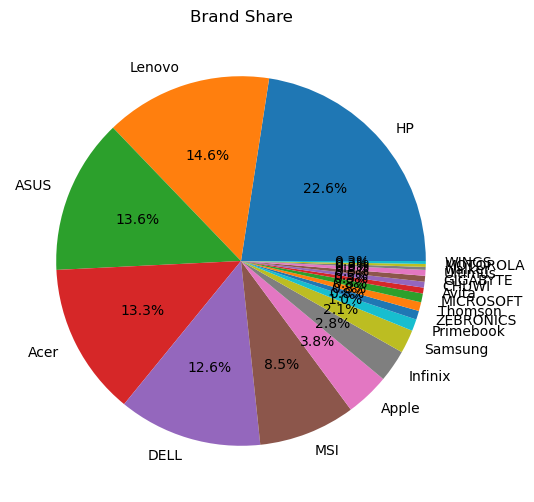

In [159]:
# Univariate Plot: Brand Pie Chart
df["Brand"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Brand Share")
plt.ylabel("")
plt.show()


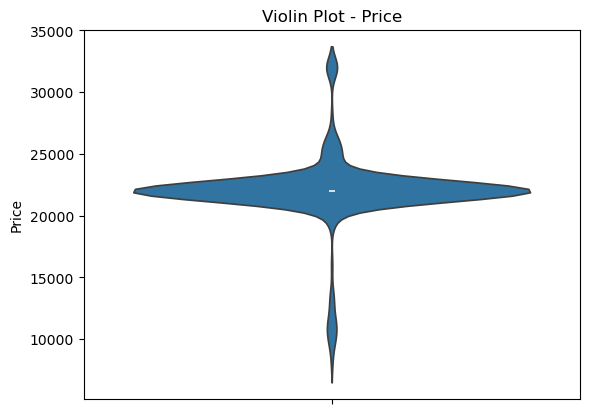

In [180]:
# Univariate Violin Plot - Price
sns.violinplot(y=df["Price"])
plt.title("Violin Plot - Price")
plt.ylabel("Price")
plt.show()


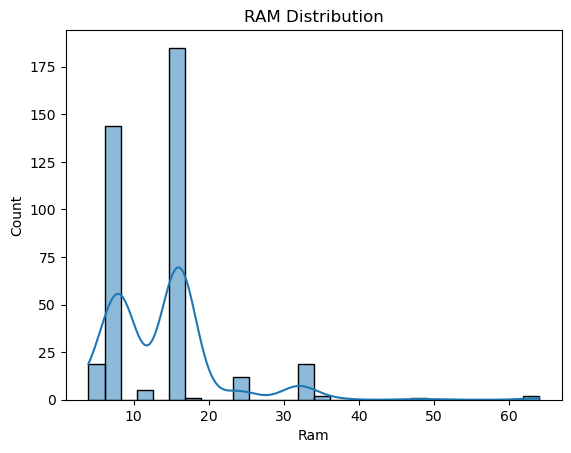

In [161]:
# Univariate Plot: RAM Histogram
sns.histplot(df["Ram"], kde=True)
plt.title("RAM Distribution")
plt.show()


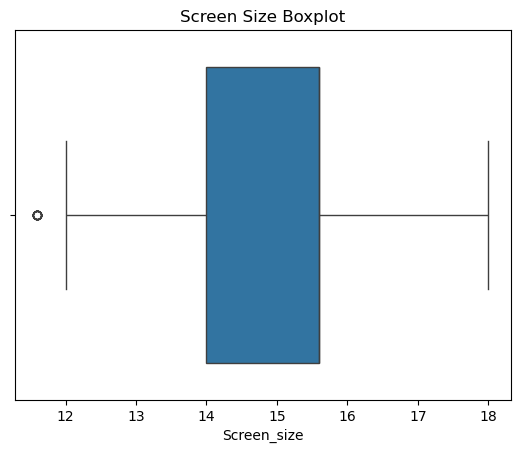

In [162]:
# Univariate Plot: Screen Size Boxplot
sns.boxplot(x=df["Screen_size"])
plt.title("Screen Size Boxplot")
plt.show()


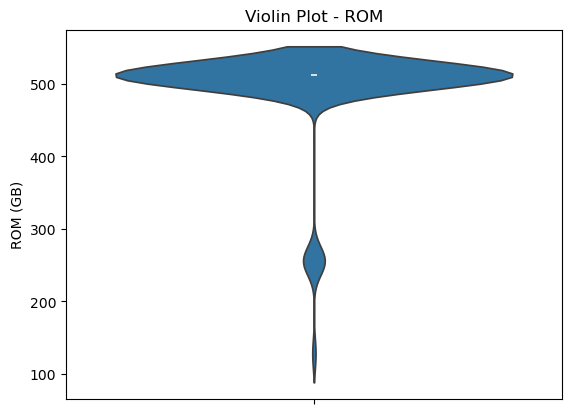

In [181]:
# Univariate Violin Plot - ROM
sns.violinplot(y=df["Rom"])
plt.title("Violin Plot - ROM")
plt.ylabel("ROM (GB)")
plt.show()


# 2.BIVARIATE ANALYSIS (Two Columns)

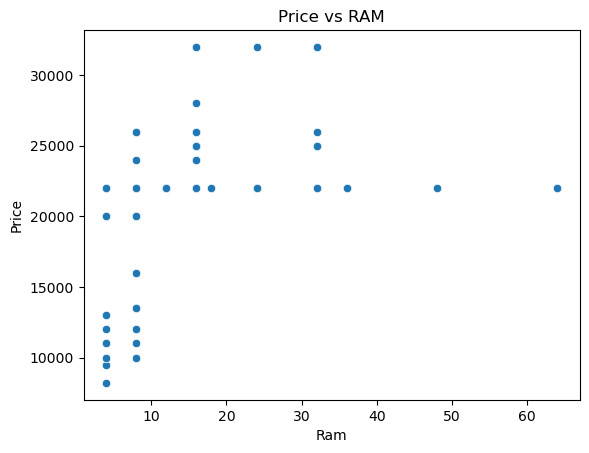

In [165]:
# Bivariate Plot: Price vs RAM
sns.scatterplot(x="Ram", y="Price", data=df)
plt.title("Price vs RAM")
plt.show()


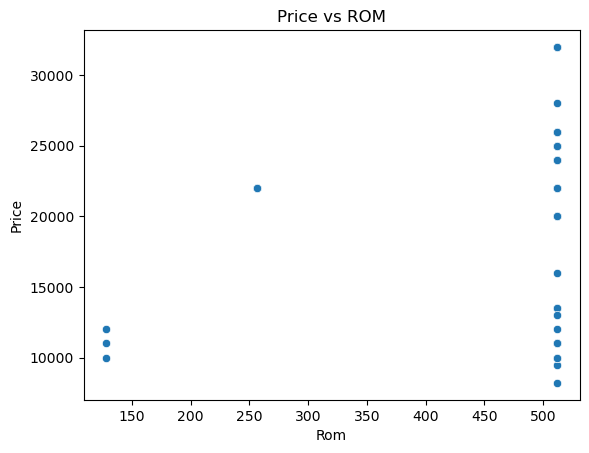

In [166]:
# Bivariate Plot: Price vs ROM
sns.scatterplot(x="Rom", y="Price", data=df)
plt.title("Price vs ROM")
plt.show()


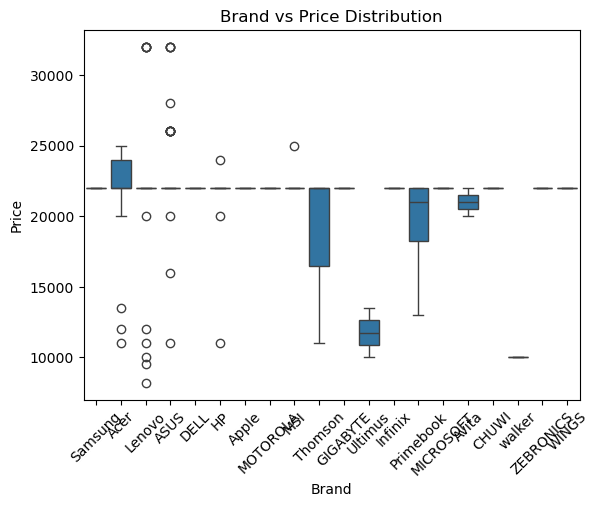

In [167]:
# Bivariate Plot: Brand vs Price
sns.boxplot(x="Brand", y="Price", data=df)
plt.title("Brand vs Price Distribution")
plt.xticks(rotation=45)
plt.show()


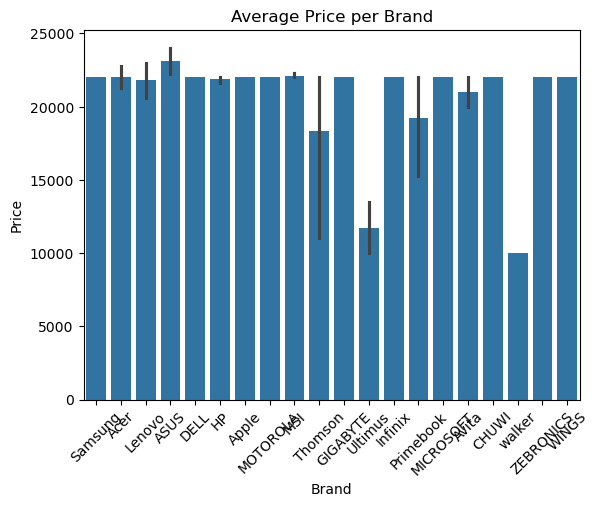

In [168]:
# Bivariate Plot: Avg Price per Brand
sns.barplot(x="Brand", y="Price", data=df, estimator="mean")
plt.title("Average Price per Brand")
plt.xticks(rotation=45)
plt.show()


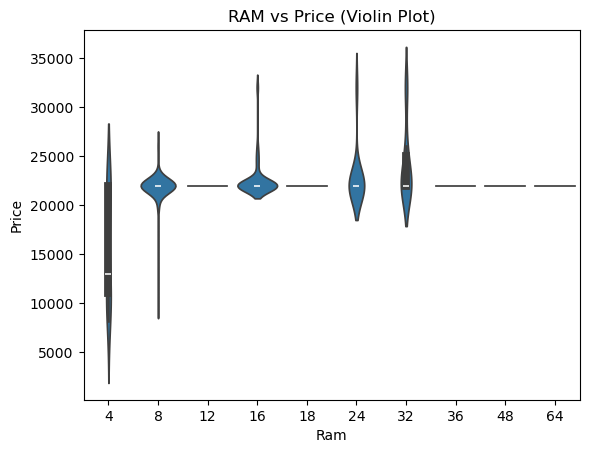

In [169]:
# Bivariate Plot: Violin Plot RAM vs Price
sns.violinplot(x="Ram", y="Price", data=df)
plt.title("RAM vs Price (Violin Plot)")
plt.show()


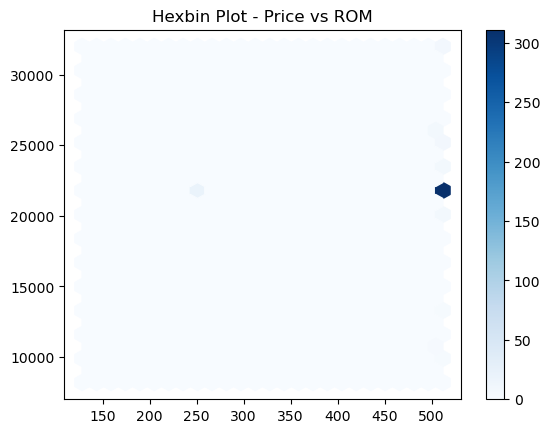

In [170]:
# Bivariate Plot: Hexbin Price vs ROM
plt.hexbin(df["Rom"], df["Price"], gridsize=25, cmap="Blues")
plt.colorbar()
plt.title("Hexbin Plot - Price vs ROM")
plt.show()


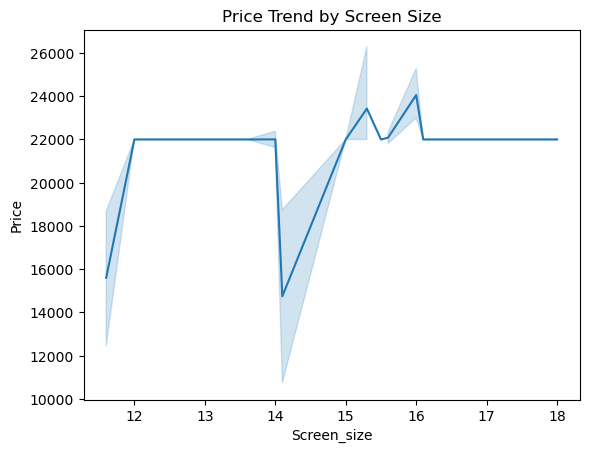

In [183]:
sns.lineplot(x="Screen_size", y="Price", data=df)
plt.title("Price Trend by Screen Size")
plt.show()


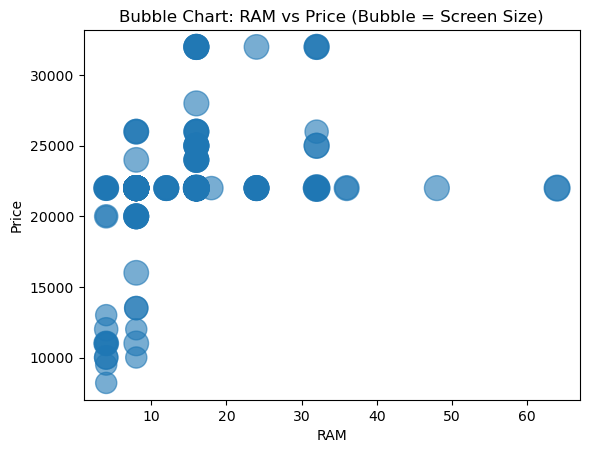

In [172]:
# Bivariate Plot: Bubble Chart
plt.scatter(df["Ram"], df["Price"], s=df["Screen_size"]*20, alpha=0.6)
plt.title("Bubble Chart: RAM vs Price (Bubble = Screen Size)")
plt.xlabel("RAM")
plt.ylabel("Price")
plt.show()


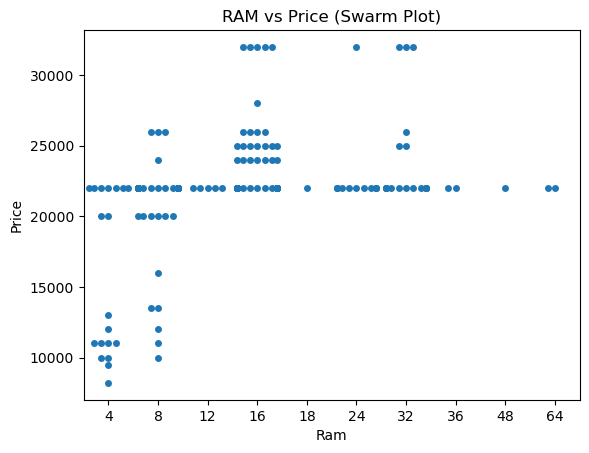

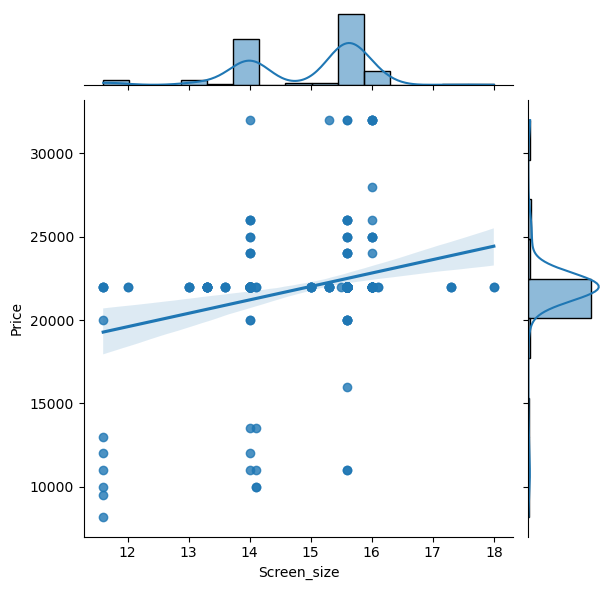

In [187]:
# Bivariate Plot: Joint Plot (Screen Size vs Price)
sns.jointplot(x="Screen_size", y="Price", data=df, kind="reg")



# 3.MULTIVARIATE PLOTS

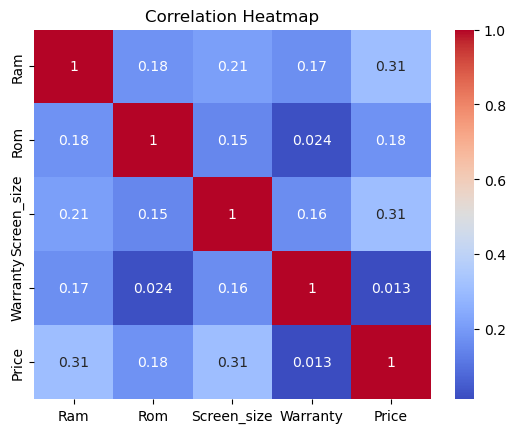

In [173]:
# Multivariate Plot: Correlation Heatmap
sns.heatmap(df[["Ram","Rom","Screen_size","Warranty","Price"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


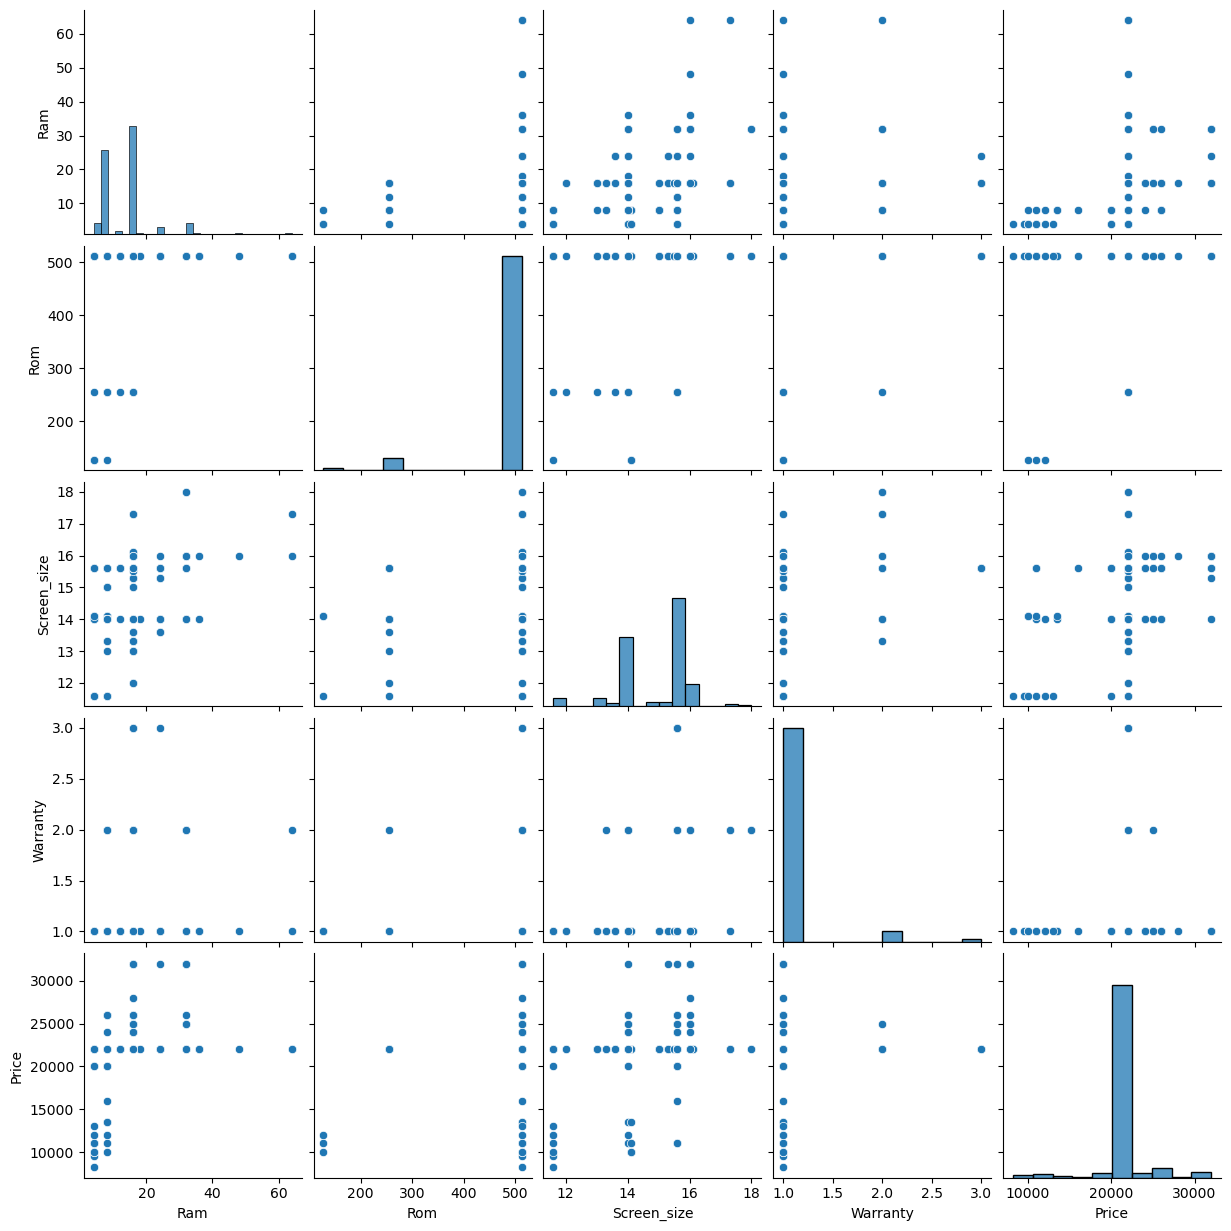

In [174]:

# Multivariate Plot: Pairplot
sns.pairplot(df[["Ram","Rom","Screen_size","Warranty","Price"]])
plt.show()


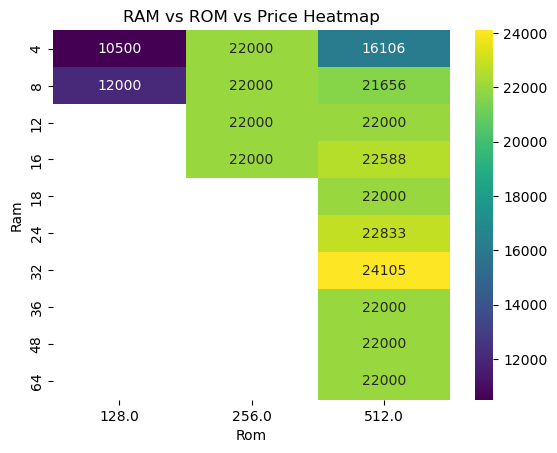

In [175]:
# Multivariate Plot: RAM vs ROM vs Price Heatmap
pivot=df.pivot_table(index="Ram", columns="Rom", values="Price", aggfunc="mean")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="viridis")
plt.title("RAM vs ROM vs Price Heatmap")
plt.show()


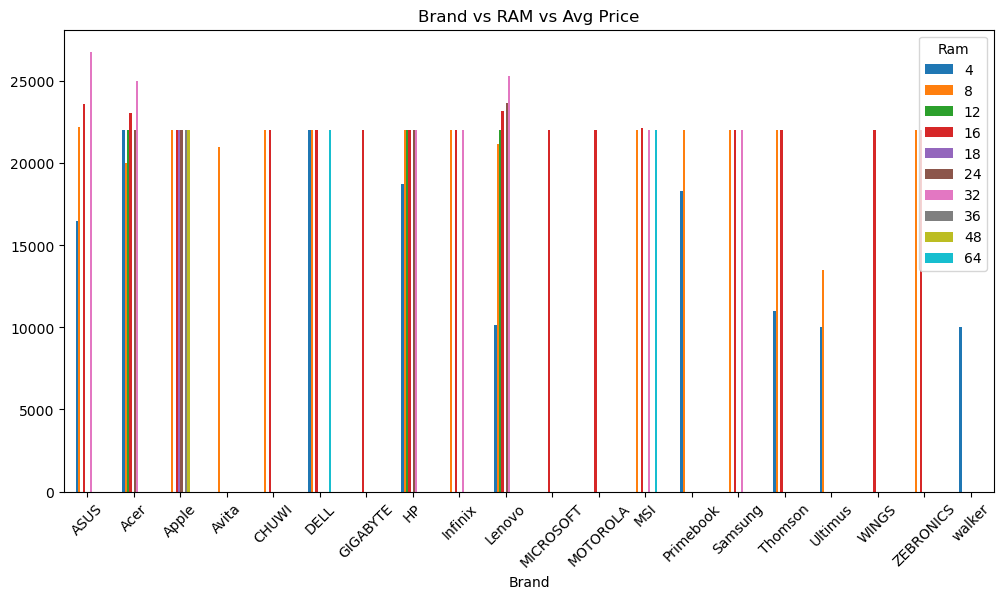

In [176]:
# Multivariate Plot: Brand vs RAM vs Price
table=df.groupby(["Brand","Ram"])["Price"].mean().unstack()
table.plot(kind="bar", figsize=(12,6))
plt.title("Brand vs RAM vs Avg Price")
plt.xticks(rotation=45)
plt.show()


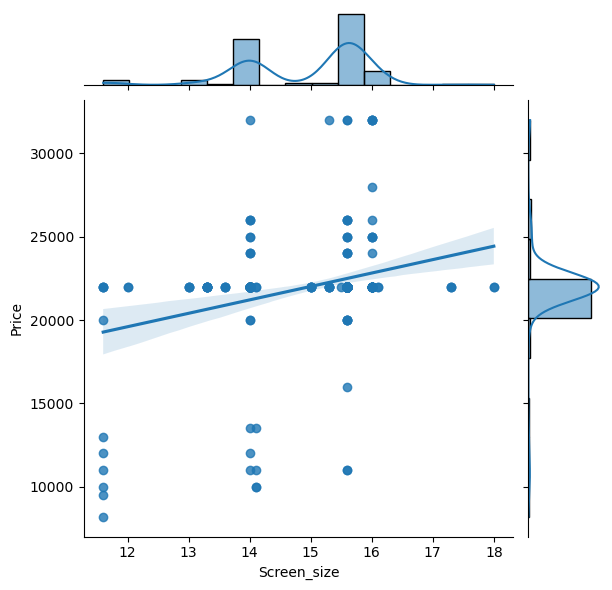

In [178]:
# Multivariate Plot: Jointplot Screen Size vs Price
sns.jointplot(x="Screen_size", y="Price", data=df, kind="reg")


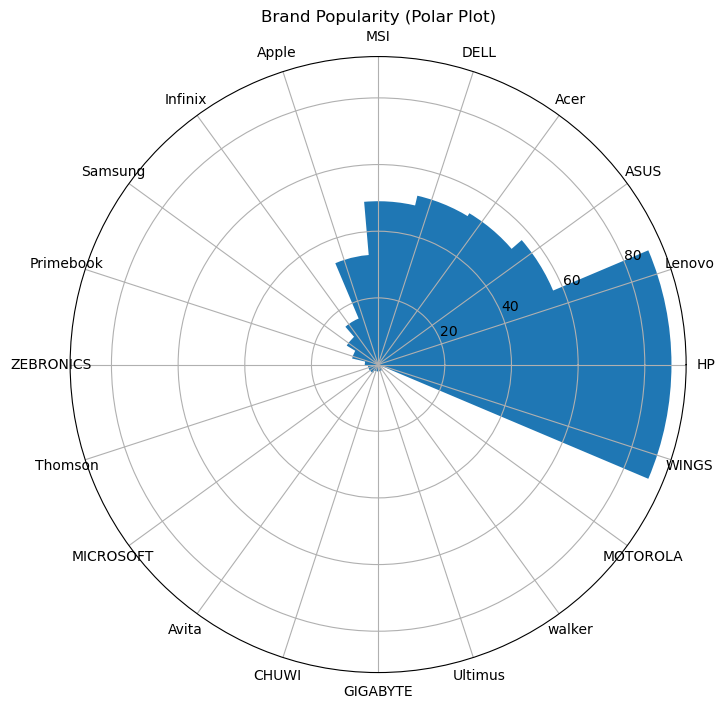

In [179]:
# Multivariate Plot: Polar Chart (Brand Frequency)
counts=df["Brand"].value_counts()
angles=np.linspace(0, 2*np.pi, len(counts), endpoint=False)
plt.figure(figsize=(8,8))
ax=plt.subplot(111, projection="polar")
ax.bar(angles, counts.values)
ax.set_xticks(angles)
ax.set_xticklabels(counts.index)
plt.title("Brand Popularity (Polar Plot)")
plt.show()


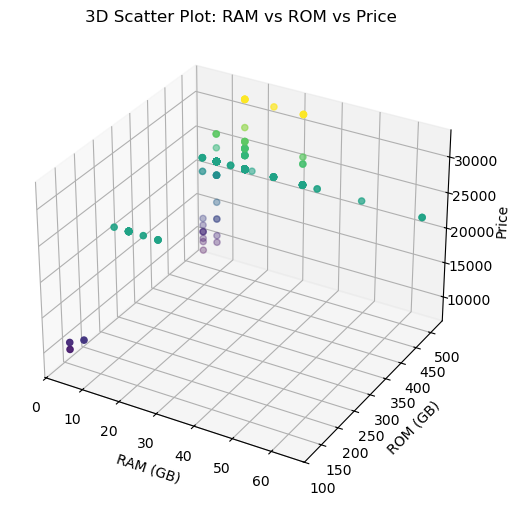

In [193]:
# 3D Plot: Scatter (RAM vs ROM vs Price)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["Ram"], df["Rom"], df["Price"], c=df["Price"], cmap="viridis")

ax.set_xlabel("RAM (GB)")
ax.set_ylabel("ROM (GB)")
ax.set_zlabel("Price")
plt.title("3D Scatter Plot: RAM vs ROM vs Price")
plt.show()


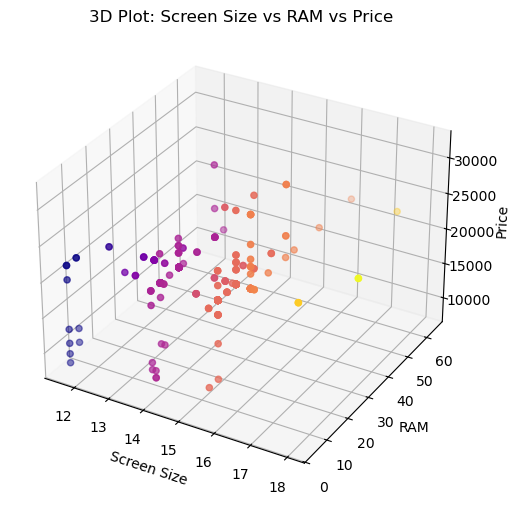

In [194]:
# 3D Plot: Screen Size vs RAM vs Price
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["Screen_size"], df["Ram"], df["Price"], c=df["Screen_size"], cmap="plasma")

ax.set_xlabel("Screen Size")
ax.set_ylabel("RAM")
ax.set_zlabel("Price")
plt.title("3D Plot: Screen Size vs RAM vs Price")
plt.show()


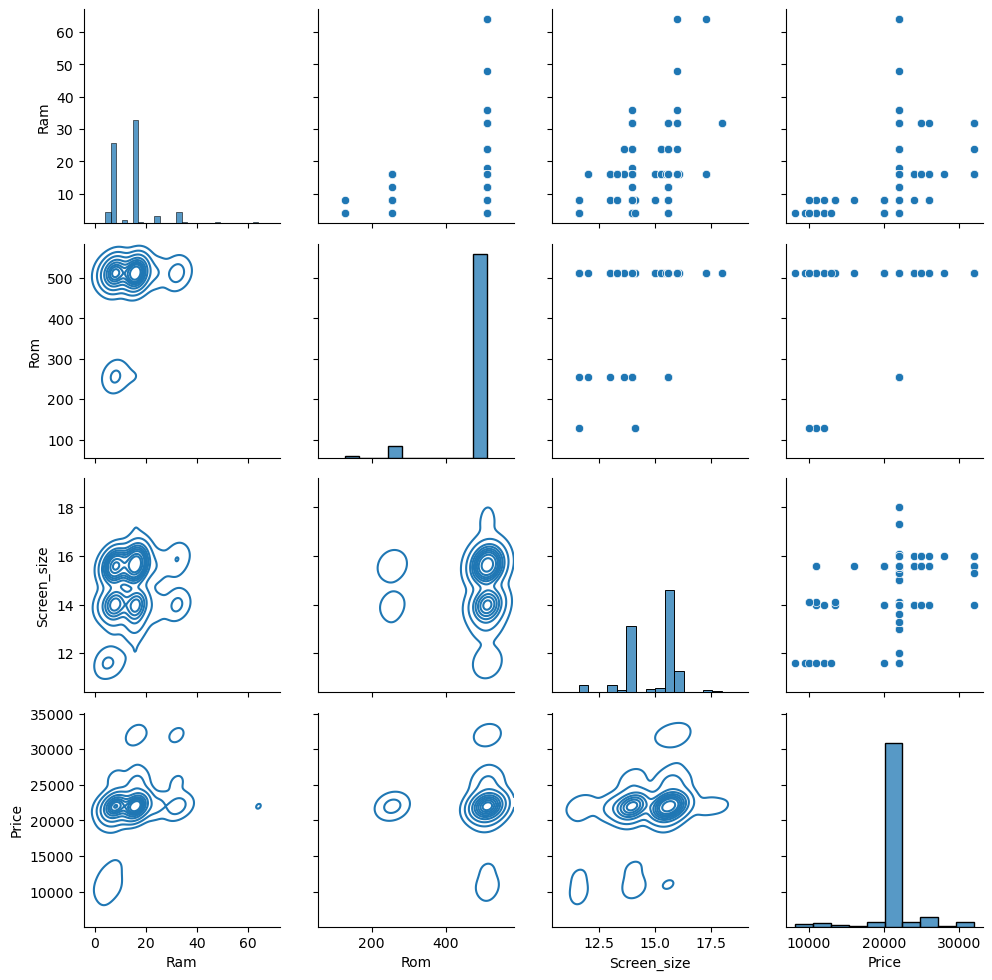

In [191]:
# Multivariate Plot: PairGrid (Advanced Multi-variable Grid)
g = sns.PairGrid(df[["Ram","Rom","Screen_size","Price"]])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
plt.show()


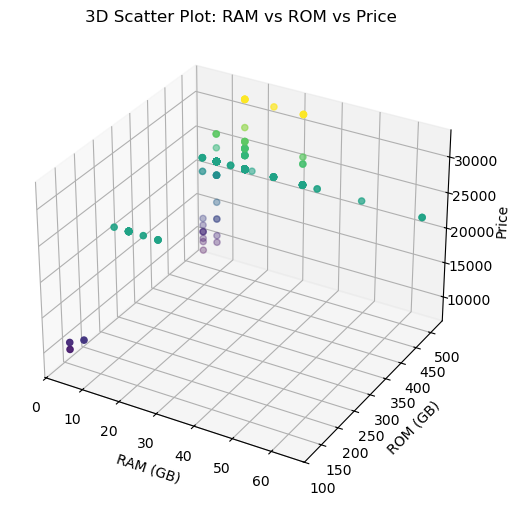

In [192]:
# 3D Plot: Scatter (RAM vs ROM vs Price)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["Ram"], df["Rom"], df["Price"], c=df["Price"], cmap="viridis")

ax.set_xlabel("RAM (GB)")
ax.set_ylabel("ROM (GB)")
ax.set_zlabel("Price")
plt.title("3D Scatter Plot: RAM vs ROM vs Price")
plt.show()


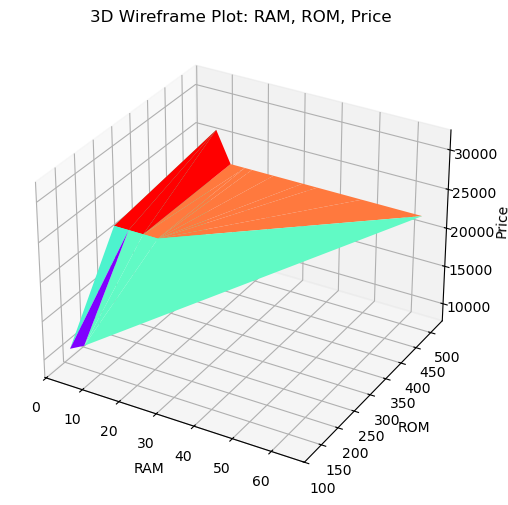

In [195]:
# 3D Wireframe Plot: RAM & ROM vs Price
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

ax.plot_trisurf(df["Ram"], df["Rom"], df["Price"], linewidth=0.2, antialiased=True, cmap="rainbow")

ax.set_xlabel("RAM")
ax.set_ylabel("ROM")
ax.set_zlabel("Price")
plt.title("3D Wireframe Plot: RAM, ROM, Price")
plt.show()


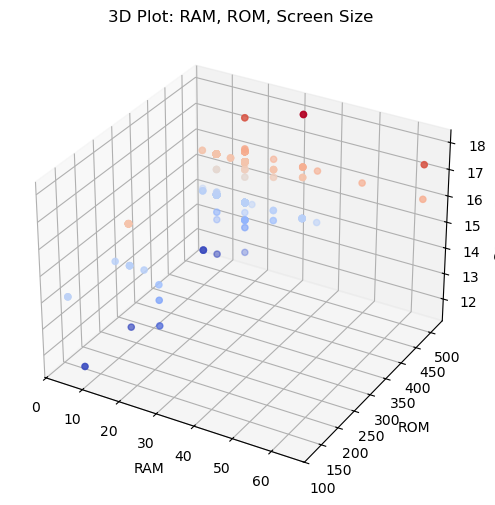

In [196]:
# 3D Plot: RAM vs ROM vs Screen Size
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["Ram"], df["Rom"], df["Screen_size"], c=df["Screen_size"], cmap="coolwarm")

ax.set_xlabel("RAM")
ax.set_ylabel("ROM")
ax.set_zlabel("Screen Size")
plt.title("3D Plot: RAM, ROM, Screen Size")
plt.show()
